# First Simple Model
The following code depicts a simple convolutional neural network.

In [1]:
# Mount google drive to notebook to pull pickle files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import time, scipy
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Activation
from sklearn.metrics import recall_score
from tensorflow.keras import layers
import pickle

In [3]:
# Open Pickle files containing train and test data
infile = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X.pickle','rb')
X = pickle.load(infile)

infile2 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y.pickle','rb')
y = pickle.load(infile2)

infile3 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_test.pickle','rb')
X_test = pickle.load(infile3)

infile4 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_test.pickle','rb')
y_test = pickle.load(infile4)

In [5]:
# First simple model
model = models.Sequential()
model.add(Flatten()) # Transform features into a single column
model.add(Dense(20, activation='relu', input_shape=X.shape[1:])) # First hidden layer
model.add(Dense(15, activation='relu')) # Second hidden layer
model.add(Dense(10, activation='relu')) # Third hidden layer
model.add(Dense(3, activation='softmax')) # Output layer, 1 node for each class

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['accuracy'])

model_score = model.fit(X, 
                        y, 
                        epochs=10, # Epochs are limited to 10 due to RAM
                        validation_split=0.2)

Epoch 1/10
1618/1618 [==============================] - 10s 6ms/step - loss: 0.6001 - accuracy: 0.2804 - val_loss: 0.5963 - val_accuracy: 0.4852
Epoch 2/10
1618/1618 [==============================] - 9s 5ms/step - loss: 0.5993 - accuracy: 0.4306 - val_loss: 0.5963 - val_accuracy: 0.4852
Epoch 3/10
1618/1618 [==============================] - 9s 6ms/step - loss: 0.5993 - accuracy: 0.4220 - val_loss: 0.5963 - val_accuracy: 0.3802
Epoch 4/10
1618/1618 [==============================] - 9s 6ms/step - loss: 0.5993 - accuracy: 0.4235 - val_loss: 0.5963 - val_accuracy: 0.4853
Epoch 5/10
1618/1618 [==============================] - 9s 5ms/step - loss: 0.5993 - accuracy: 0.4261 - val_loss: 0.5963 - val_accuracy: 0.1345
Epoch 6/10
1618/1618 [==============================] - 9s 5ms/step - loss: 0.5993 - accuracy: 0.4221 - val_loss: 0.5963 - val_accuracy: 0.4853
Epoch 7/10
1618/1618 [==============================] - 9s 5ms/step - loss: 0.5993 - accuracy: 0.4144 - val_loss: 0.5963 - val_accuracy

In [6]:
from google.colab import files
src = list(files.upload().values())[0]
open('helpers.py','wb').write(src)
import helpers as hp

Saving helpers.py to helpers.py


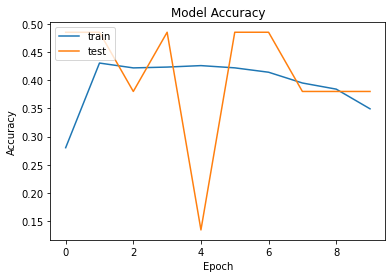

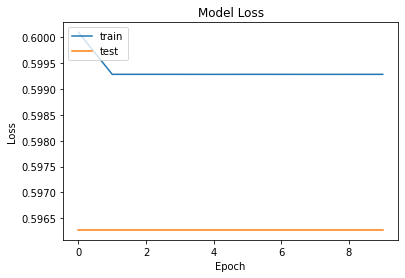

In [7]:
hp.plot_model_train_val_accuracy_loss(model_score)

In [8]:
model.evaluate(X_test, y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.5984 - accuracy: 0.3817


[0.5984049439430237, 0.38168931007385254]

This first simple model has the same - and at times a worse - accuracy than the baseline model. When the model is exposed to unseen data as is seen in the cell above, the accuracy is 10% worse at 38%. In preceeded models I will increase model complexity by adding additional layers and augment the data to address class imbalance in the `sexy` and `neutral` classes.